# Question 4

In [2]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### A

In [3]:
from google.colab import files
uploaded = files.upload()

Saving houses.csv to houses.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['houses.csv']))

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### B

In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### c

In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [9]:
corr_sort= corr.sort_values(by='price', ascending=False)
corr_sort.style.background_gradient(cmap='coolwarm').format(precision=3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,-0.017,1.000,0.308,0.525,0.702,0.090,0.257,0.266,0.397,0.036,0.667,0.606,0.324,0.054,0.126,-0.053,0.307,0.022,0.585,0.082
sqft_living,-0.012,0.702,0.577,0.755,1.000,0.173,0.354,0.104,0.285,-0.059,0.763,0.877,0.435,0.318,0.055,-0.199,0.053,0.240,0.756,0.183
grade,0.008,0.667,0.357,0.665,0.763,0.114,0.458,0.083,0.251,-0.145,1.000,0.756,0.168,0.447,0.014,-0.185,0.114,0.198,0.713,0.119
sqft_above,-0.011,0.606,0.478,0.685,0.877,0.184,0.524,0.072,0.168,-0.158,0.756,1.000,-0.052,0.424,0.023,-0.261,-0.001,0.344,0.732,0.194
sqft_living15,-0.003,0.585,0.392,0.569,0.756,0.145,0.280,0.086,0.280,-0.093,0.713,0.732,0.200,0.326,-0.003,-0.279,0.049,0.335,1.000,0.183
bathrooms,0.005,0.525,0.516,1.000,0.755,0.088,0.501,0.064,0.188,-0.125,0.665,0.685,0.284,0.506,0.051,-0.204,0.025,0.223,0.569,0.087
view,0.012,0.397,0.080,0.188,0.285,0.075,0.029,0.402,1.000,0.046,0.251,0.168,0.277,-0.053,0.104,0.085,0.006,-0.078,0.280,0.073
sqft_basement,-0.005,0.324,0.303,0.284,0.435,0.015,-0.246,0.081,0.277,0.174,0.168,-0.052,1.000,-0.133,0.071,0.075,0.111,-0.145,0.200,0.017
bedrooms,0.001,0.308,1.000,0.516,0.577,0.032,0.175,-0.007,0.080,0.028,0.357,0.478,0.303,0.154,0.019,-0.153,-0.009,0.129,0.392,0.029
lat,-0.002,0.307,-0.009,0.025,0.053,-0.086,0.050,-0.014,0.006,-0.015,0.114,-0.001,0.111,-0.148,0.029,0.267,1.000,-0.136,0.049,-0.086


In [10]:
corr_sort.iloc[:,1:2].style.background_gradient(cmap='coolwarm').format(precision=3)

,price
price,1.000
sqft_living,0.702
grade,0.667
sqft_above,0.606
sqft_living15,0.585
bathrooms,0.525
view,0.397
sqft_basement,0.324
bedrooms,0.308
lat,0.307


### D

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


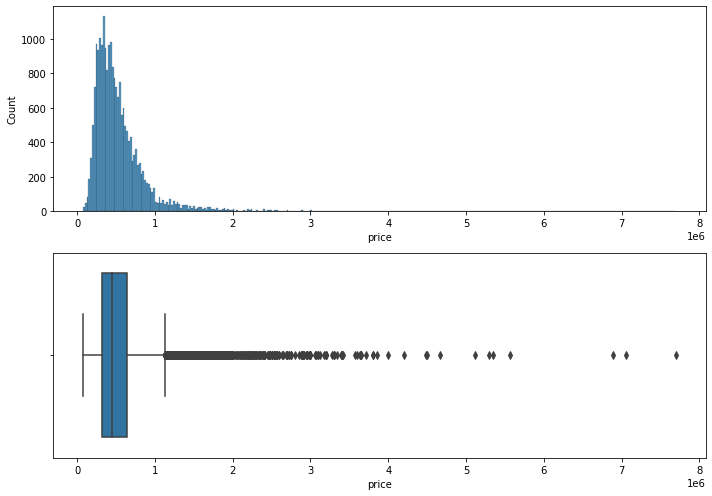

In [11]:
#visualizing house prices
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.histplot(df['price'])
fig.add_subplot(2,1,2)
sns.boxplot(df['price'])
plt.tight_layout()

In [12]:
df_price_sqft= (df.loc[:,['price','sqft_living']] - df.loc[:,['price','sqft_living']].mean()) / df.loc[:,['price','sqft_living']].std()
df_price_sqft

,price,sqft_living
0,-0.866697,-0.979812
1,-0.005688,0.533622
2,-0.980827,-1.426221
3,0.174086,-0.130547
4,-0.081956,-0.435412
...,...,...
21608,-0.490533,-0.598732
21609,-0.381579,0.250534
21610,-0.375856,-1.154021
21611,-0.381579,-0.522516


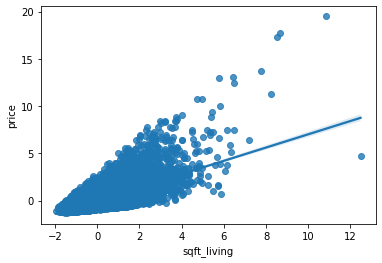

In [13]:
sns.regplot(x= df_price_sqft['sqft_living'],y= df_price_sqft['price'])

### E

In [14]:
df['year']= df.date.apply(lambda x: x[:4])

In [15]:
df['month']= df.date.apply(lambda x: x[4:6])

In [16]:
df.drop('date', axis= 1, inplace= True)

In [17]:
df.year= df.year.astype(int)
df.month= df.month.astype(int)

In [18]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


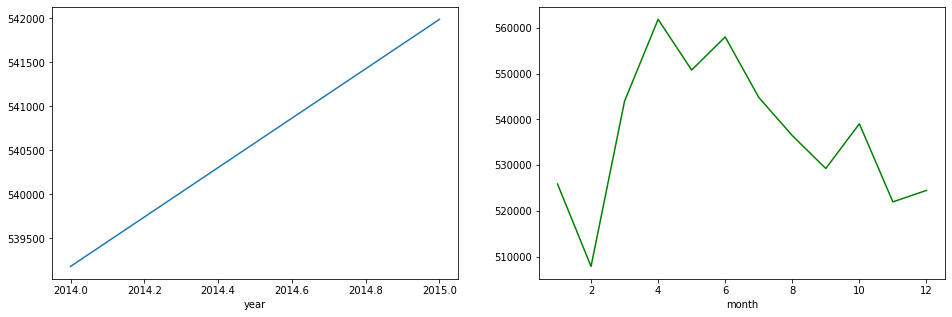

In [19]:
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)
df.groupby('year').mean()['price'].plot()

fig.add_subplot(1,2,2)
df.groupby('month').mean()['price'].plot(color= 'green')


### F

In [20]:
#split train & test
data= np.array(df.iloc[:,1:])
np.random.shuffle(data)

In [21]:
X= data[:,1:]
Y= data[:, 0]

In [22]:
split= int(len(data)*0.8)
x_train, x_test= X[:split] , X[split:]
y_train, y_test= Y[:split] , Y[split:]

In [23]:
y_train= y_train.reshape((17290,1))
y_test= y_test.reshape((4323,1))

In [24]:
print("shape of X_train : ", x_train.shape)
print("shape of y_train : ", y_train.shape)

print("shape of X_test : ", x_test.shape)
print("shape of y_test : ", y_test.shape)

shape of X_train :  (17290, 20)
shape of y_train :  (17290, 1)
shape of X_test :  (4323, 20)
shape of y_test :  (4323, 1)


### G

In [25]:
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
year               int64
month              int64
dtype: object

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler_x= MinMaxScaler().fit(x_train)

In [28]:
x_train_scaled= scaler_x.transform(x_train)
x_train_scaled

array([[0.09090909, 0.21875   , 0.10188679, ..., 0.22992388, 0.        ,
        0.54545455],
       [0.09090909, 0.125     , 0.11622642, ..., 0.00840849, 0.        ,
        0.45454545],
       [0.09090909, 0.21875   , 0.15471698, ..., 0.00589973, 1.        ,
        0.36363636],
       ...,
       [0.12121212, 0.3125    , 0.20377358, ..., 0.01328013, 0.        ,
        0.54545455],
       [0.09090909, 0.21875   , 0.1154717 , ..., 0.0893195 , 1.        ,
        0.27272727],
       [0.12121212, 0.28125   , 0.18339623, ..., 0.02026767, 0.        ,
        0.72727273]])

In [29]:
scaler_y= MinMaxScaler().fit(y_train)
y_train_scaled= scaler_y.transform(y_train)
y_train_scaled

array([[0.05536605],
       [0.04270533],
       [0.05917082],
       ...,
       [0.08947783],
       [0.03042941],
       [0.07438992]])

In [30]:
x_test_scaled= scaler_x.transform(x_test)
x_test_scaled

array([[0.06060606, 0.125     , 0.04981132, ..., 0.00624204, 0.        ,
        0.45454545],
       [0.09090909, 0.21875   , 0.11320755, ..., 0.06742297, 1.        ,
        0.27272727],
       [0.06060606, 0.1875    , 0.09554717, ..., 0.01910863, 0.        ,
        1.        ],
       ...,
       [0.12121212, 0.25      , 0.1509434 , ..., 0.0028706 , 1.        ,
        0.09090909],
       [0.12121212, 0.3125    , 0.13207547, ..., 0.02427204, 1.        ,
        0.27272727],
       [0.09090909, 0.1875    , 0.13811321, ..., 0.00513354, 0.        ,
        1.        ]])

In [31]:
y_test_scaled= scaler_y.transform(y_test)
y_test_scaled

array([[0.0317502 ],
       [0.0317502 ],
       [0.01885332],
       ...,
       [0.07963789],
       [0.05156127],
       [0.08600105]])

In [32]:
split_val= int(len(x_train_scaled)*0.8)
xtrain_scaled, x_val= x_train_scaled[:split_val] , x_train_scaled[split_val:]
ytrain_scaled, y_val= y_train_scaled[:split_val] , y_train_scaled[split_val:]

In [33]:
print("shape of X_train : ", xtrain_scaled.shape)
print("shape of y_train : ", ytrain_scaled.shape)

print("shape of X_val : ", x_val.shape)
print("shape of y_val : ", y_val.shape)

shape of X_train :  (13832, 20)
shape of y_train :  (13832, 1)
shape of X_val :  (3458, 20)
shape of y_val :  (3458, 1)


### H

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F 

In [35]:
class MLP(nn.Module):
    def __init__(self, in_x, n_h1, n_h2, n_y):
        super().__init__()

        self.input_fc = nn.Linear(in_x, n_h1)
        self.hidden_fc = nn.Linear(n_h1, n_h2)
        self.output_fc = nn.Linear(n_h2, n_y)

    def forward(self, x):

        h_1 = F.relu(self.input_fc(x))

        h_2 = F.relu(self.hidden_fc(h_1))

        y_pred = self.output_fc(h_2)

        return y_pred

### I

In [36]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch import optim
from torch.optim.lr_scheduler import StepLR
from tqdm import tqdm

In [37]:
class myDataset(Dataset):
  '''
  Prepare the dataset
  '''

  def __init__(self, X, y):
      self.X = torch.from_numpy(X).float()
      self.y = torch.from_numpy(y).float()

  def __len__(self):
      return len(self.X)

  def __getitem__(self, i):
      return self.X[i], self.y[i]

In [38]:
train_data = myDataset(xtrain_scaled, ytrain_scaled)
val_data = myDataset(x_val, y_val)
test_data = myDataset(x_test_scaled, y_test_scaled)

In [39]:
BATCH_SIZE = 10

train_loader = DataLoader(train_data,
                                 shuffle=True,
                                 batch_size=BATCH_SIZE)

val_loader = DataLoader(val_data,
                                 batch_size=BATCH_SIZE)

test_loader = DataLoader(test_data,
                         shuffle=True,
                                batch_size=BATCH_SIZE)

#### We examine four different modes:

In [40]:
#1
def MSE_SGD(net):
    #Mean Squared Error Loss Function
    criterion = nn.MSELoss()
    # SGD
    optimizer = optim.SGD(net.parameters(), lr=10e-4, momentum=0.9,weight_decay=4e-6)
    name_loss_optim = 'Train & Validation Loss (Model1: Loss Function= MSE, optimizer= SGD)'
    return criterion, optimizer, name_loss_optim

In [41]:
#2
def MSE_ADAM(net):
   #Mean Squared Error Loss Function
    criterion = nn.MSELoss()
    #ADAM
    optimizer = optim.Adam(net.parameters())
    name_loss_optim = 'Train & Validation Loss (Model2: Loss Function= MSE, optimizer= Adam)'
    return criterion, optimizer, name_loss_optim

In [42]:
#3
def L1_SGD(net):
    #Mean Absolute Error (L1 Loss Function)
    criterion = nn.L1Loss()
    # SGD
    optimizer = optim.SGD(net.parameters(), lr=10e-4, momentum=0.9,weight_decay=4e-6)
    name_loss_optim = 'Train & Validation Loss (Model3: Loss Function= L1, optimizer= SGD)'
    return criterion, optimizer, name_loss_optim

In [43]:
#4
def L1_ADAM(net):
    #Mean Absolute Error (L1 Loss Function)
    criterion = nn.L1Loss()
    #ADAM
    optimizer = optim.Adam(net.parameters())
    name_loss_optim = 'Train & Validation Loss (Model4: Loss Function= L1, optimizer= Adam)'
    return criterion, optimizer, name_loss_optim

### J

In [44]:
#model 1

In [45]:
net1= MLP(x_train_scaled.shape[1], 30, 15, y_train.shape[1])

In [46]:
criterion, optimizer, name_loss_optim= MSE_SGD(net1)

In [47]:
scheduler = StepLR(optimizer, step_size=4, gamma=0.5)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [48]:
net1.to(device)
total_epochs = 30
train_loss = []
val_loss = []

for epoch in range(total_epochs):
    total_train_loss = 0
    total_val_loss = 0
    
    net1.train()
    train_batch_number= 1
    train_batches = tqdm(train_loader)
    for (x,y) in train_batches:
        x , y = x.to(device), y.to(device)
        net_output = net1(x)
        tr_loss = criterion(net_output,y)
        optimizer.zero_grad()
        tr_loss.backward()
        optimizer.step()
        total_train_loss += tr_loss.item()
        mean_train_loss = total_train_loss/train_batch_number
        train_batch_number += 1
        
        train_batches.set_postfix(loss=mean_train_loss, refresh=True)
    train_loss.append(mean_train_loss)
  
    with torch.no_grad():
        net1.eval()
        val_batch_number = 1
        val_batches = tqdm(val_loader)
        for (x,y) in val_batches:
            x , y = x.to(device), y.to(device)
            net_output = net1(x)
            tst_loss = criterion(net_output , y)
            total_val_loss += tst_loss.item()
            mean_val_loss = total_val_loss / val_batch_number
            val_batch_number += 1
            
            val_batches.set_postfix(loss=mean_val_loss, refresh=True)
        val_loss.append(mean_val_loss)
        
        print(f'at epoch {epoch+1}  train loss is {mean_train_loss}')
        print(f'at epoch {epoch+1}  val loss is {mean_val_loss}')
    scheduler.step()

100%|██████████| 346/346 [00:00<00:00, 361.53it/s, loss=0.00243]


at epoch 1  train loss is 0.0025781873847372902
at epoch 1  val loss is 0.0024344990771574056


100%|██████████| 346/346 [00:00<00:00, 421.08it/s, loss=0.00225]


at epoch 2  train loss is 0.0020902055434896013
at epoch 2  val loss is 0.002248143888745831


100%|██████████| 346/346 [00:00<00:00, 417.01it/s, loss=0.00212]


at epoch 3  train loss is 0.0019427602436278093
at epoch 3  val loss is 0.0021229428661424625


100%|██████████| 346/346 [00:01<00:00, 289.71it/s, loss=0.00203]


at epoch 4  train loss is 0.001835028243923561
at epoch 4  val loss is 0.0020266691169542033


100%|██████████| 346/346 [00:00<00:00, 357.76it/s, loss=0.00196]


at epoch 5  train loss is 0.0017637851174133353
at epoch 5  val loss is 0.0019645823215906954


100%|██████████| 346/346 [00:00<00:00, 431.25it/s, loss=0.00192]


at epoch 6  train loss is 0.0017178484552359964
at epoch 6  val loss is 0.0019175390427934834


100%|██████████| 346/346 [00:00<00:00, 479.34it/s, loss=0.00187]


at epoch 7  train loss is 0.0016753924944847007
at epoch 7  val loss is 0.0018720606550899997


100%|██████████| 346/346 [00:00<00:00, 395.48it/s, loss=0.00183]


at epoch 8  train loss is 0.0016339742419115356
at epoch 8  val loss is 0.0018310005049997768


100%|██████████| 346/346 [00:01<00:00, 318.06it/s, loss=0.00181]


at epoch 9  train loss is 0.0016041649107999525
at epoch 9  val loss is 0.0018072861715790552


100%|██████████| 346/346 [00:01<00:00, 333.46it/s, loss=0.00179]


at epoch 10  train loss is 0.0015846279920406021
at epoch 10  val loss is 0.0017870153520256954


100%|██████████| 346/346 [00:01<00:00, 311.34it/s, loss=0.00177]


at epoch 11  train loss is 0.0015650529786014917
at epoch 11  val loss is 0.0017664967867043785


100%|██████████| 346/346 [00:00<00:00, 451.18it/s, loss=0.00175]


at epoch 12  train loss is 0.0015468129438510646
at epoch 12  val loss is 0.0017453422687050747


100%|██████████| 346/346 [00:00<00:00, 431.72it/s, loss=0.00174]


at epoch 13  train loss is 0.0015332912508642818
at epoch 13  val loss is 0.0017355425105241096


100%|██████████| 346/346 [00:01<00:00, 260.45it/s, loss=0.00173]


at epoch 14  train loss is 0.0015239915296634625
at epoch 14  val loss is 0.0017266947305202753


100%|██████████| 346/346 [00:01<00:00, 267.72it/s, loss=0.00172]


at epoch 15  train loss is 0.0015147870769391574
at epoch 15  val loss is 0.0017159090737529257


100%|██████████| 346/346 [00:01<00:00, 327.67it/s, loss=0.00171]


at epoch 16  train loss is 0.0015060759919649797
at epoch 16  val loss is 0.001706532639618041


100%|██████████| 346/346 [00:00<00:00, 373.92it/s, loss=0.0017]


at epoch 17  train loss is 0.0014993491461062916
at epoch 17  val loss is 0.0017016962153525521


100%|██████████| 346/346 [00:00<00:00, 480.38it/s, loss=0.0017]


at epoch 18  train loss is 0.0014952990401081079
at epoch 18  val loss is 0.0016970322180343885


100%|██████████| 346/346 [00:00<00:00, 348.51it/s, loss=0.00169]


at epoch 19  train loss is 0.0014905231842468611
at epoch 19  val loss is 0.0016923838672004412


100%|██████████| 346/346 [00:00<00:00, 351.91it/s, loss=0.00169]


at epoch 20  train loss is 0.0014862790894451955
at epoch 20  val loss is 0.0016875054483366538


100%|██████████| 346/346 [00:01<00:00, 273.64it/s, loss=0.00169]


at epoch 21  train loss is 0.0014827552086515456
at epoch 21  val loss is 0.001685302252096435


100%|██████████| 346/346 [00:01<00:00, 308.16it/s, loss=0.00168]


at epoch 22  train loss is 0.001480691943449418
at epoch 22  val loss is 0.0016830309418107805


100%|██████████| 346/346 [00:01<00:00, 336.87it/s, loss=0.00168]


at epoch 23  train loss is 0.0014784373318623778
at epoch 23  val loss is 0.0016807363245510388


100%|██████████| 346/346 [00:00<00:00, 366.71it/s, loss=0.00168]


at epoch 24  train loss is 0.0014766172815069763
at epoch 24  val loss is 0.0016783764759129764


100%|██████████| 346/346 [00:00<00:00, 357.25it/s, loss=0.00168]


at epoch 25  train loss is 0.0014785566696456553
at epoch 25  val loss is 0.0016772779680666045


100%|██████████| 346/346 [00:01<00:00, 294.70it/s, loss=0.00168]


at epoch 26  train loss is 0.0014741602703302542
at epoch 26  val loss is 0.0016760765436713413


100%|██████████| 346/346 [00:01<00:00, 266.91it/s, loss=0.00167]


at epoch 27  train loss is 0.0014726084644417178
at epoch 27  val loss is 0.0016749164876163024


100%|██████████| 346/346 [00:01<00:00, 268.63it/s, loss=0.00167]


at epoch 28  train loss is 0.0014715327951113184
at epoch 28  val loss is 0.0016737772694412373


100%|██████████| 346/346 [00:01<00:00, 322.36it/s, loss=0.00167]


at epoch 29  train loss is 0.0014708388078550428
at epoch 29  val loss is 0.0016732211834148806


100%|██████████| 346/346 [00:00<00:00, 383.34it/s, loss=0.00167]

at epoch 30  train loss is 0.0014707123638926286
at epoch 30  val loss is 0.0016726368997512504


In [49]:
def plot(train_loss,val_loss):
    plt.figure(figsize=(12,8))
    plt.plot(list(range(1,len(train_loss)+1)), train_loss,label='Train Loss')
    plt.plot(list(range(1,len(train_loss)+1)), val_loss,label='Validation Loss')
    plt.title(name_loss_optim)
    plt.legend(loc=0)
    plt.show()

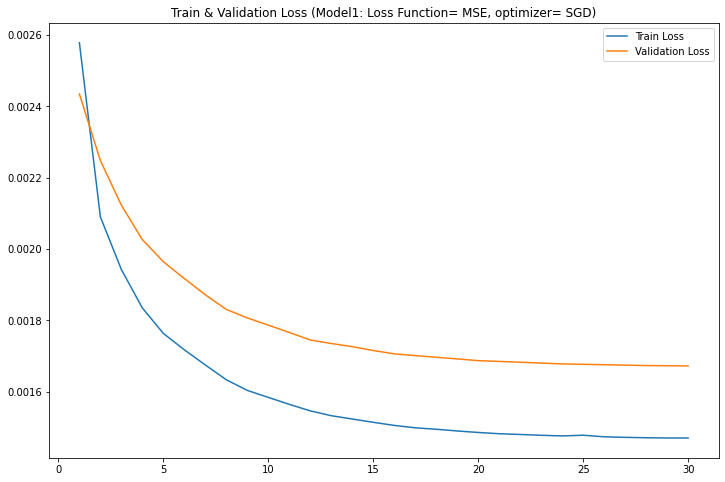

In [50]:
plot(train_loss,val_loss)

In [51]:
# model 2

In [52]:
net2= MLP(x_train_scaled.shape[1], 30, 15, y_train.shape[1])

In [53]:
criterion, optimizer, name_loss_optim= MSE_ADAM(net2)
scheduler = StepLR(optimizer, step_size=4, gamma=0.5)

In [54]:
net2.to(device)
total_epochs = 30
train_loss = []
val_loss = []

for epoch in range(total_epochs):
    total_train_loss = 0
    total_val_loss = 0
    
    net2.train()
    train_batch_number= 1
    train_batches = tqdm(train_loader)
    for (x,y) in train_batches:
        x , y = x.to(device), y.to(device)
        net_output = net2(x)
        tr_loss = criterion(net_output,y)
        optimizer.zero_grad()
        tr_loss.backward()
        optimizer.step()
        total_train_loss += tr_loss.item()
        mean_train_loss = total_train_loss/train_batch_number
        train_batch_number += 1
        
        train_batches.set_postfix(loss=mean_train_loss, refresh=True)
    train_loss.append(mean_train_loss)
  
    with torch.no_grad():
        net2.eval()
        val_batch_number = 1
        val_batches = tqdm(val_loader)
        for (x,y) in val_batches:
            x , y = x.to(device), y.to(device)
            net_output = net2(x)
            tst_loss = criterion(net_output , y)
            total_val_loss += tst_loss.item()
            mean_val_loss = total_val_loss / val_batch_number
            val_batch_number += 1
            
            val_batches.set_postfix(loss=mean_val_loss, refresh=True)
        val_loss.append(mean_val_loss)
        
        print(f'at epoch {epoch+1}  train loss is {mean_train_loss}')
        print(f'at epoch {epoch+1}  val loss is {mean_val_loss}')
    scheduler.step()

100%|██████████| 346/346 [00:00<00:00, 382.58it/s, loss=0.000716]


at epoch 1  train loss is 0.0008558858374829211
at epoch 1  val loss is 0.000715854307899899


100%|██████████| 346/346 [00:00<00:00, 355.43it/s, loss=0.000574]


at epoch 2  train loss is 0.0006222734806619962
at epoch 2  val loss is 0.0005736382439432429


100%|██████████| 346/346 [00:00<00:00, 433.29it/s, loss=0.000601]


at epoch 3  train loss is 0.0005504859701639656
at epoch 3  val loss is 0.00060121075974776


100%|██████████| 346/346 [00:00<00:00, 443.61it/s, loss=0.000572]


at epoch 4  train loss is 0.0005135967005216868
at epoch 4  val loss is 0.0005720047159445125


100%|██████████| 346/346 [00:00<00:00, 449.85it/s, loss=0.000479]


at epoch 5  train loss is 0.0004316577886476355
at epoch 5  val loss is 0.00047852700360157533


100%|██████████| 346/346 [00:00<00:00, 435.73it/s, loss=0.000446]


at epoch 6  train loss is 0.0004206683175282238
at epoch 6  val loss is 0.00044618370287346446


100%|██████████| 346/346 [00:00<00:00, 445.78it/s, loss=0.000454]


at epoch 7  train loss is 0.0003920604759603762
at epoch 7  val loss is 0.00045353809691943035


100%|██████████| 346/346 [00:00<00:00, 395.36it/s, loss=0.000429]


at epoch 8  train loss is 0.00039155280444644417
at epoch 8  val loss is 0.00042948553628759925


100%|██████████| 346/346 [00:00<00:00, 445.26it/s, loss=0.000401]


at epoch 9  train loss is 0.00035676297963061447
at epoch 9  val loss is 0.0004011048344066542


100%|██████████| 346/346 [00:00<00:00, 431.45it/s, loss=0.0004]


at epoch 10  train loss is 0.0003459047785114213
at epoch 10  val loss is 0.00039974483392185215


100%|██████████| 346/346 [00:00<00:00, 436.44it/s, loss=0.00039]


at epoch 11  train loss is 0.0003507596360107217
at epoch 11  val loss is 0.0003903871721571589


100%|██████████| 346/346 [00:00<00:00, 463.17it/s, loss=0.000393]


at epoch 12  train loss is 0.0003364576867819663
at epoch 12  val loss is 0.0003932562221488996


100%|██████████| 346/346 [00:00<00:00, 442.20it/s, loss=0.000381]


at epoch 13  train loss is 0.0003235738110174811
at epoch 13  val loss is 0.0003807912212244714


100%|██████████| 346/346 [00:00<00:00, 393.27it/s, loss=0.000372]


at epoch 14  train loss is 0.00031935723447557886
at epoch 14  val loss is 0.00037243671672276726


100%|██████████| 346/346 [00:01<00:00, 206.57it/s, loss=0.000375]


at epoch 15  train loss is 0.00032021709710329164
at epoch 15  val loss is 0.0003750729374324676


100%|██████████| 346/346 [00:00<00:00, 351.31it/s, loss=0.000373]


at epoch 16  train loss is 0.000315618464934085
at epoch 16  val loss is 0.0003727280313770369


100%|██████████| 346/346 [00:00<00:00, 346.62it/s, loss=0.000366]


at epoch 17  train loss is 0.0003085083272712232
at epoch 17  val loss is 0.00036564972544584566


100%|██████████| 346/346 [00:00<00:00, 370.32it/s, loss=0.000368]


at epoch 18  train loss is 0.0003066172660739035
at epoch 18  val loss is 0.0003675519680544869


100%|██████████| 346/346 [00:00<00:00, 448.12it/s, loss=0.000366]


at epoch 19  train loss is 0.00031066175416340046
at epoch 19  val loss is 0.0003660452397410002


100%|██████████| 346/346 [00:01<00:00, 314.27it/s, loss=0.000362]


at epoch 20  train loss is 0.00030549193434849074
at epoch 20  val loss is 0.0003619593657686771


100%|██████████| 346/346 [00:00<00:00, 439.19it/s, loss=0.000361]


at epoch 21  train loss is 0.0003004202534088886
at epoch 21  val loss is 0.00036117548921338626


100%|██████████| 346/346 [00:00<00:00, 504.76it/s, loss=0.000362]


at epoch 22  train loss is 0.00030002789688853877
at epoch 22  val loss is 0.00036159254062171004


100%|██████████| 346/346 [00:00<00:00, 436.66it/s, loss=0.000363]


at epoch 23  train loss is 0.00029841666327231806
at epoch 23  val loss is 0.0003626441380772063


100%|██████████| 346/346 [00:00<00:00, 460.53it/s, loss=0.00036]


at epoch 24  train loss is 0.0002983641261919261
at epoch 24  val loss is 0.000360304498700563


100%|██████████| 346/346 [00:00<00:00, 447.25it/s, loss=0.000359]


at epoch 25  train loss is 0.0002966133178489208
at epoch 25  val loss is 0.0003592301118523226


100%|██████████| 346/346 [00:00<00:00, 515.14it/s, loss=0.000358]


at epoch 26  train loss is 0.0002958713471264941
at epoch 26  val loss is 0.00035778129228090965


100%|██████████| 346/346 [00:01<00:00, 303.76it/s, loss=0.000357]


at epoch 27  train loss is 0.0002963810261101208
at epoch 27  val loss is 0.00035728799823139633


100%|██████████| 346/346 [00:00<00:00, 438.59it/s, loss=0.000358]


at epoch 28  train loss is 0.0002956895740111829
at epoch 28  val loss is 0.00035790912814347836


100%|██████████| 346/346 [00:00<00:00, 390.56it/s, loss=0.000357]


at epoch 29  train loss is 0.00029451899713205023
at epoch 29  val loss is 0.00035746835474759464


100%|██████████| 346/346 [00:00<00:00, 357.41it/s, loss=0.000358]

at epoch 30  train loss is 0.00029401714555850133
at epoch 30  val loss is 0.00035764604720661


In [55]:
def plot(train_loss,val_loss):
    plt.figure(figsize=(12,8))
    plt.plot(list(range(1,len(train_loss)+1)), train_loss,label='Train Loss')
    plt.plot(list(range(1,len(train_loss)+1)), val_loss,label='Validation Loss')
    plt.title(name_loss_optim)
    plt.legend(loc=0)
    plt.show()

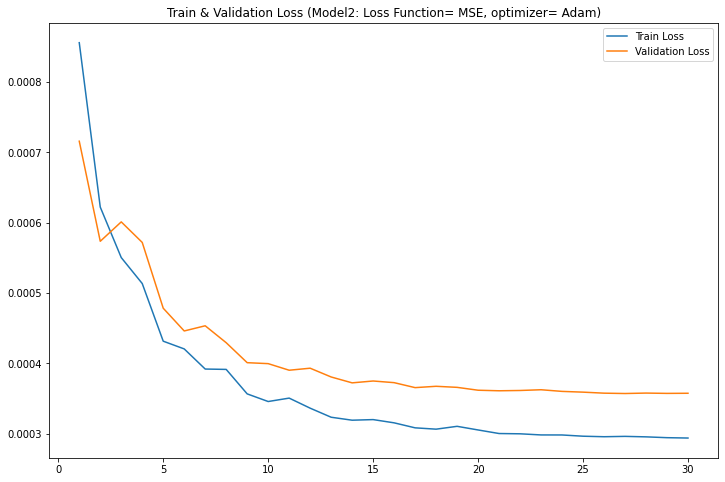

In [56]:
plot(train_loss,val_loss)

In [57]:
#model 3

In [58]:
net3= MLP(x_train_scaled.shape[1], 30, 15, y_train.shape[1])

In [59]:
criterion, optimizer, name_loss_optim= L1_SGD(net3)
scheduler = StepLR(optimizer, step_size=4, gamma=0.5)

In [60]:
net3.to(device)
total_epochs = 30
train_loss = []
val_loss = []

for epoch in range(total_epochs):
    total_train_loss = 0
    total_val_loss = 0
    
    net3.train()
    train_batch_number= 1
    train_batches = tqdm(train_loader)
    for (x,y) in train_batches:
        x , y = x.to(device), y.to(device)
        net_output = net3(x)
        tr_loss = criterion(net_output,y)
        optimizer.zero_grad()
        tr_loss.backward()
        optimizer.step()
        total_train_loss += tr_loss.item()
        mean_train_loss = total_train_loss/train_batch_number
        train_batch_number += 1
        
        train_batches.set_postfix(loss=mean_train_loss, refresh=True)
    train_loss.append(mean_train_loss)
  
    with torch.no_grad():
        net3.eval()
        val_batch_number = 1
        val_batches = tqdm(val_loader)
        for (x,y) in val_batches:
            x , y = x.to(device), y.to(device)
            net_output = net3(x)
            tst_loss = criterion(net_output , y)
            total_val_loss += tst_loss.item()
            mean_val_loss = total_val_loss / val_batch_number
            val_batch_number += 1
            
            val_batches.set_postfix(loss=mean_val_loss, refresh=True)
        val_loss.append(mean_val_loss)
        
        print(f'at epoch {epoch+1}  train loss is {mean_train_loss}')
        print(f'at epoch {epoch+1}  val loss is {mean_val_loss}')
    scheduler.step()

100%|██████████| 346/346 [00:00<00:00, 478.50it/s, loss=0.019]


at epoch 1  train loss is 0.02470881744917762
at epoch 1  val loss is 0.018957730087941525


100%|██████████| 346/346 [00:01<00:00, 247.39it/s, loss=0.0169]


at epoch 2  train loss is 0.017138467194523253
at epoch 2  val loss is 0.01691656200635123


100%|██████████| 346/346 [00:00<00:00, 354.63it/s, loss=0.0173]


at epoch 3  train loss is 0.01621191819485094
at epoch 3  val loss is 0.0173378433962218


100%|██████████| 346/346 [00:00<00:00, 402.30it/s, loss=0.0162]


at epoch 4  train loss is 0.01602380702338004
at epoch 4  val loss is 0.016197982958835587


100%|██████████| 346/346 [00:00<00:00, 402.01it/s, loss=0.016]


at epoch 5  train loss is 0.01573729306873946
at epoch 5  val loss is 0.016012354408030133


100%|██████████| 346/346 [00:00<00:00, 444.59it/s, loss=0.0159]


at epoch 6  train loss is 0.015668616296704643
at epoch 6  val loss is 0.015935417478688794


100%|██████████| 346/346 [00:01<00:00, 295.28it/s, loss=0.016]


at epoch 7  train loss is 0.015659139574050494
at epoch 7  val loss is 0.01597296155725385


100%|██████████| 346/346 [00:00<00:00, 362.51it/s, loss=0.0158]


at epoch 8  train loss is 0.015620188553403051
at epoch 8  val loss is 0.015837747743622416


100%|██████████| 346/346 [00:01<00:00, 333.36it/s, loss=0.0162]


at epoch 9  train loss is 0.015460561048623034
at epoch 9  val loss is 0.01619088926051092


100%|██████████| 346/346 [00:01<00:00, 327.98it/s, loss=0.0159]


at epoch 10  train loss is 0.015445470932408134
at epoch 10  val loss is 0.01586247885712783


100%|██████████| 346/346 [00:00<00:00, 352.40it/s, loss=0.0158]


at epoch 11  train loss is 0.015396474682957451
at epoch 11  val loss is 0.015787991641272356


100%|██████████| 346/346 [00:00<00:00, 370.31it/s, loss=0.0158]


at epoch 12  train loss is 0.015409859692048002
at epoch 12  val loss is 0.01576479993130732


100%|██████████| 346/346 [00:01<00:00, 261.51it/s, loss=0.0158]


at epoch 13  train loss is 0.015324069998251285
at epoch 13  val loss is 0.015772363500712667


100%|██████████| 346/346 [00:00<00:00, 357.85it/s, loss=0.0158]


at epoch 14  train loss is 0.015313066028709917
at epoch 14  val loss is 0.015805051394205304


100%|██████████| 346/346 [00:01<00:00, 249.05it/s, loss=0.0158]


at epoch 15  train loss is 0.015307347448017835
at epoch 15  val loss is 0.015778741221928787


100%|██████████| 346/346 [00:00<00:00, 357.50it/s, loss=0.0157]


at epoch 16  train loss is 0.015305177519579735
at epoch 16  val loss is 0.015733763323881465


100%|██████████| 346/346 [00:00<00:00, 355.43it/s, loss=0.0159]


at epoch 17  train loss is 0.01526757663942206
at epoch 17  val loss is 0.015926028089059484


100%|██████████| 346/346 [00:00<00:00, 403.78it/s, loss=0.0157]


at epoch 18  train loss is 0.015265694934964944
at epoch 18  val loss is 0.015697822976060684


100%|██████████| 346/346 [00:00<00:00, 352.44it/s, loss=0.0157]


at epoch 19  train loss is 0.01527989785505911
at epoch 19  val loss is 0.015700172439131434


100%|██████████| 346/346 [00:00<00:00, 360.45it/s, loss=0.0157]


at epoch 20  train loss is 0.01525949998412179
at epoch 20  val loss is 0.015690856929491626


100%|██████████| 346/346 [00:01<00:00, 322.48it/s, loss=0.0157]


at epoch 21  train loss is 0.015244072618439384
at epoch 21  val loss is 0.015740022253019015


100%|██████████| 346/346 [00:00<00:00, 346.84it/s, loss=0.0157]


at epoch 22  train loss is 0.01523667436484732
at epoch 22  val loss is 0.01568951782759688


100%|██████████| 346/346 [00:00<00:00, 451.83it/s, loss=0.0157]


at epoch 23  train loss is 0.015238036075707881
at epoch 23  val loss is 0.01570990013168597


100%|██████████| 346/346 [00:01<00:00, 339.48it/s, loss=0.0157]


at epoch 24  train loss is 0.015236027827627709
at epoch 24  val loss is 0.015683239865563595


100%|██████████| 346/346 [00:01<00:00, 259.50it/s, loss=0.0157]


at epoch 25  train loss is 0.015244763615545198
at epoch 25  val loss is 0.01568679577224172


100%|██████████| 346/346 [00:01<00:00, 253.19it/s, loss=0.0158]


at epoch 26  train loss is 0.015219039687781858
at epoch 26  val loss is 0.015771610586973975


100%|██████████| 346/346 [00:01<00:00, 339.58it/s, loss=0.0157]


at epoch 27  train loss is 0.015221651456106152
at epoch 27  val loss is 0.01573312503414907


100%|██████████| 346/346 [00:01<00:00, 300.75it/s, loss=0.0157]


at epoch 28  train loss is 0.015211479689904375
at epoch 28  val loss is 0.015693677949982915


100%|██████████| 346/346 [00:02<00:00, 158.47it/s, loss=0.0157]


at epoch 29  train loss is 0.015223469534711213
at epoch 29  val loss is 0.015696120974634683


100%|██████████| 346/346 [00:01<00:00, 237.26it/s, loss=0.0157]

at epoch 30  train loss is 0.015220349715791125
at epoch 30  val loss is 0.015686113196236723


In [61]:
def plot(train_loss,val_loss):
    plt.figure(figsize=(12,8))
    plt.plot(list(range(1,len(train_loss)+1)), train_loss,label='Train Loss')
    plt.plot(list(range(1,len(train_loss)+1)), val_loss,label='Validation Loss')
    plt.title(name_loss_optim)
    plt.legend(loc=0)
    plt.show()

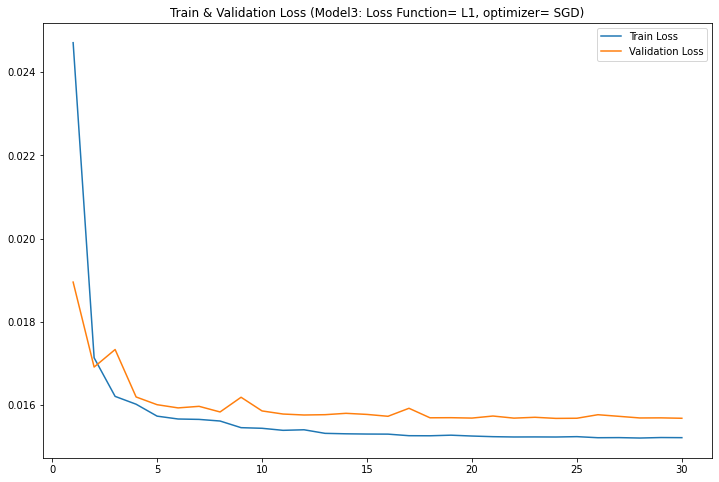

In [62]:
plot(train_loss,val_loss)

In [63]:
#model 4

In [64]:
net4= MLP(x_train_scaled.shape[1], 30, 15, y_train.shape[1])

In [65]:
criterion, optimizer, name_loss_optim= L1_ADAM(net4)
scheduler = StepLR(optimizer, step_size=4, gamma=0.5)

In [66]:
net4.to(device)
total_epochs = 30
train_loss = []
val_loss = []

for epoch in range(total_epochs):
    total_train_loss = 0
    total_val_loss = 0
    
    net4.train()
    train_batch_number= 1
    train_batches = tqdm(train_loader)
    for (x,y) in train_batches:
        x , y = x.to(device), y.to(device)
        net_output = net4(x)
        tr_loss = criterion(net_output,y)
        optimizer.zero_grad()
        tr_loss.backward()
        optimizer.step()
        total_train_loss += tr_loss.item()
        mean_train_loss = total_train_loss/train_batch_number
        train_batch_number += 1
        
        train_batches.set_postfix(loss=mean_train_loss, refresh=True)
    train_loss.append(mean_train_loss)
  
    with torch.no_grad():
        net4.eval()
        val_batch_number = 1
        val_batches = tqdm(val_loader)
        for (x,y) in val_batches:
            x , y = x.to(device), y.to(device)
            net_output = net4(x)
            tst_loss = criterion(net_output , y)
            total_val_loss += tst_loss.item()
            mean_val_loss = total_val_loss / val_batch_number
            val_batch_number += 1
            
            val_batches.set_postfix(loss=mean_val_loss, refresh=True)
        val_loss.append(mean_val_loss)
        
        print(f'at epoch {epoch+1}  train loss is {mean_train_loss}')
        print(f'at epoch {epoch+1}  val loss is {mean_val_loss}')
    scheduler.step()

100%|██████████| 346/346 [00:00<00:00, 439.90it/s, loss=0.0149]


at epoch 1  train loss is 0.01850314940964518
at epoch 1  val loss is 0.01488111411070591


100%|██████████| 346/346 [00:00<00:00, 465.48it/s, loss=0.0143]


at epoch 2  train loss is 0.014589641932626874
at epoch 2  val loss is 0.014336873093523042


100%|██████████| 346/346 [00:00<00:00, 350.11it/s, loss=0.0131]


at epoch 3  train loss is 0.013555797059028383
at epoch 3  val loss is 0.013067215726161752


100%|██████████| 346/346 [00:00<00:00, 388.67it/s, loss=0.012]


at epoch 4  train loss is 0.012565185988827937
at epoch 4  val loss is 0.011972939520212956


100%|██████████| 346/346 [00:00<00:00, 460.47it/s, loss=0.0116]


at epoch 5  train loss is 0.011355752699720442
at epoch 5  val loss is 0.011554506084494121


100%|██████████| 346/346 [00:00<00:00, 434.21it/s, loss=0.0117]


at epoch 6  train loss is 0.01110161369080343
at epoch 6  val loss is 0.01169648383692919


100%|██████████| 346/346 [00:00<00:00, 470.93it/s, loss=0.0112]


at epoch 7  train loss is 0.010849004897532575
at epoch 7  val loss is 0.011181962614437576


100%|██████████| 346/346 [00:00<00:00, 465.28it/s, loss=0.0112]


at epoch 8  train loss is 0.01078687162280508
at epoch 8  val loss is 0.011181021273416074


100%|██████████| 346/346 [00:00<00:00, 412.66it/s, loss=0.0107]


at epoch 9  train loss is 0.010290834908555343
at epoch 9  val loss is 0.010652919075817861


100%|██████████| 346/346 [00:01<00:00, 229.94it/s, loss=0.011]


at epoch 10  train loss is 0.010178397334082526
at epoch 10  val loss is 0.010965948874626114


100%|██████████| 346/346 [00:00<00:00, 460.21it/s, loss=0.0105]


at epoch 11  train loss is 0.010165545036457748
at epoch 11  val loss is 0.010456307150552728


100%|██████████| 346/346 [00:00<00:00, 436.02it/s, loss=0.0108]


at epoch 12  train loss is 0.01007228675823271
at epoch 12  val loss is 0.01078455824932525


100%|██████████| 346/346 [00:00<00:00, 393.30it/s, loss=0.0104]


at epoch 13  train loss is 0.00990262083376817
at epoch 13  val loss is 0.010393769542196755


100%|██████████| 346/346 [00:00<00:00, 447.11it/s, loss=0.0103]


at epoch 14  train loss is 0.009857336065268974
at epoch 14  val loss is 0.010341092407154296


100%|██████████| 346/346 [00:00<00:00, 477.72it/s, loss=0.0103]


at epoch 15  train loss is 0.009822179134692889
at epoch 15  val loss is 0.010317300548615483


100%|██████████| 346/346 [00:00<00:00, 419.91it/s, loss=0.0103]


at epoch 16  train loss is 0.009762371710408748
at epoch 16  val loss is 0.010306159363093252


100%|██████████| 346/346 [00:00<00:00, 445.69it/s, loss=0.0103]


at epoch 17  train loss is 0.009675880173703041
at epoch 17  val loss is 0.010266570313133817


100%|██████████| 346/346 [00:00<00:00, 470.74it/s, loss=0.0103]


at epoch 18  train loss is 0.009655910506750312
at epoch 18  val loss is 0.010283348544882987


100%|██████████| 346/346 [00:00<00:00, 471.96it/s, loss=0.0102]


at epoch 19  train loss is 0.009648491732939012
at epoch 19  val loss is 0.01019378668679775


100%|██████████| 346/346 [00:01<00:00, 335.37it/s, loss=0.0103]


at epoch 20  train loss is 0.009634525974744101
at epoch 20  val loss is 0.010348740861498121


100%|██████████| 346/346 [00:00<00:00, 429.00it/s, loss=0.0102]


at epoch 21  train loss is 0.00957007379007978
at epoch 21  val loss is 0.010213745743806091


100%|██████████| 346/346 [00:01<00:00, 329.88it/s, loss=0.0102]


at epoch 22  train loss is 0.009561316854780745
at epoch 22  val loss is 0.010206515065695811


100%|██████████| 346/346 [00:00<00:00, 507.91it/s, loss=0.0102]


at epoch 23  train loss is 0.00954634323985332
at epoch 23  val loss is 0.01018814318826842


100%|██████████| 346/346 [00:00<00:00, 395.58it/s, loss=0.0102]


at epoch 24  train loss is 0.009551964706446535
at epoch 24  val loss is 0.01018902503500418


100%|██████████| 346/346 [00:00<00:00, 401.11it/s, loss=0.0101]


at epoch 25  train loss is 0.009513720868167473
at epoch 25  val loss is 0.010143756288415995


100%|██████████| 346/346 [00:00<00:00, 346.66it/s, loss=0.0102]


at epoch 26  train loss is 0.009508844577899805
at epoch 26  val loss is 0.01015913849117805


100%|██████████| 346/346 [00:01<00:00, 313.83it/s, loss=0.0101]


at epoch 27  train loss is 0.009538854549304485
at epoch 27  val loss is 0.010148852534667518


100%|██████████| 346/346 [00:00<00:00, 375.15it/s, loss=0.0101]


at epoch 28  train loss is 0.00950325562550035
at epoch 28  val loss is 0.010145259630796365


100%|██████████| 346/346 [00:00<00:00, 380.71it/s, loss=0.0101]


at epoch 29  train loss is 0.009494725532016872
at epoch 29  val loss is 0.010141881251427738


100%|██████████| 346/346 [00:01<00:00, 273.13it/s, loss=0.0101]

at epoch 30  train loss is 0.009482835760646947
at epoch 30  val loss is 0.010149454099739864


In [67]:
def plot(train_loss,val_loss):
    plt.figure(figsize=(12,8))
    plt.plot(list(range(1,len(train_loss)+1)), train_loss,label='Train Loss')
    plt.plot(list(range(1,len(train_loss)+1)), val_loss,label='Validation Loss')
    plt.title(name_loss_optim)
    plt.legend(loc=0)
    plt.show()

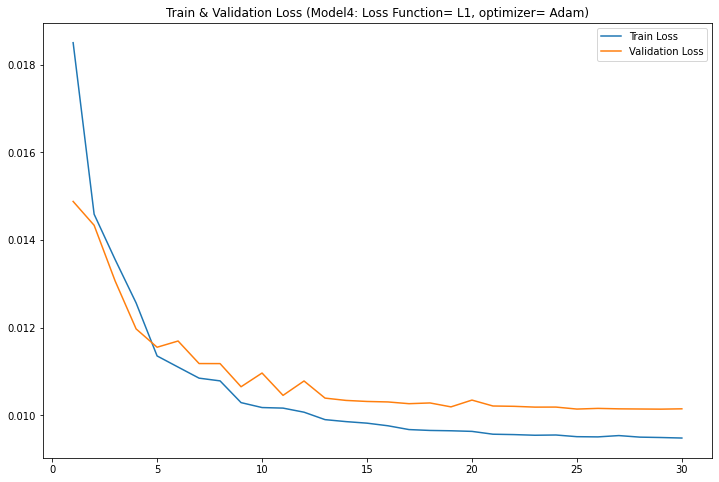

In [68]:
plot(train_loss,val_loss)

#### prediction

In [69]:
def get_predictions(net, iterator, device):

    net.eval()

    inputs = []
    prices = []
    predicts= []

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)
            y = y.to(device)
            y_pred= net(x)


            inputs.append(x.cpu())
            prices.append(y.cpu())
            predicts.append(y_pred.cpu())

    inputs = torch.cat(inputs, dim=0)
    prices = torch.cat(prices, dim=0)
    predicts = torch.cat(predicts, dim=0)

    return inputs, prices,predicts

In [70]:
inputs, prices, predicts = get_predictions(net2, test_loader, device)


In [71]:
print('Test data:',inputs)
print('Prices:', prices)
print('Predicted prices:', predicts)

Test data: tensor([[0.1212, 0.2812, 0.1932,  ..., 0.0090, 0.0000, 0.8182],
        [0.0909, 0.4375, 0.2438,  ..., 0.0448, 0.0000, 0.5455],
        [0.1212, 0.2812, 0.1147,  ..., 0.0048, 0.0000, 0.3636],
        ...,
        [0.1515, 0.3750, 0.2936,  ..., 0.0068, 0.0000, 0.6364],
        [0.0909, 0.3125, 0.2075,  ..., 0.0395, 0.0000, 1.0000],
        [0.0909, 0.1250, 0.0528,  ..., 0.0086, 0.0000, 0.7273]])
Prices: tensor([[0.0606],
        [0.0514],
        [0.0363],
        ...,
        [0.0781],
        [0.0934],
        [0.0304]])
Predicted prices: tensor([[0.0780],
        [0.0484],
        [0.0364],
        ...,
        [0.0863],
        [0.0948],
        [0.0331]])


### K

In [86]:
data_of_test = next(iter(test_loader))
five_data= np.random.choice(np.arange(10),5,replace= False)
t= 1
for i in five_data:
    print(t,')')
    Predicted_price= scaler_y.inverse_transform([[net2(data_of_test[0][i]).item()]]).item()
    Price= scaler_y.inverse_transform([[data_of_test[1][i].item()]]).item()
    print('Predicted price=',Predicted_price, ', Price=',Price)
    diff= abs(Predicted_price - Price)
    print('difference between predicted and real price=',diff,'\n')
    t += 1

1 )
Predicted price= 249242.52592027184 , Price= 275000.00663101673
difference between predicted and real price= 25757.480710744887 

2 )
Predicted price= 416184.9262714386 , Price= 374999.98837709427
difference between predicted and real price= 41184.93789434433 

3 )
Predicted price= 294895.85319161415 , Price= 210000.00429898498
difference between predicted and real price= 84895.84889262918 

4 )
Predicted price= 369369.3123459816 , Price= 366999.98983740807
difference between predicted and real price= 2369.322508573532 

5 )
Predicted price= 230283.9706689119 , Price= 259999.99517202374
difference between predicted and real price= 29716.02450311184 



In [73]:
PATH1 = './house_net1.pth'
torch.save(net1.state_dict(), PATH1)

In [74]:
PATH2 = './house_net2.pth'
torch.save(net2.state_dict(), PATH2)

In [75]:
PATH3 = './house_net3.pth'
torch.save(net3.state_dict(), PATH3)

In [76]:
PATH4 = './house_net4.pth'
torch.save(net4.state_dict(), PATH4)

In [77]:
# net1 = Net()
# net1.load_state_dict(torch.load(PATH1))

# net2 = Net()
# net2.load_state_dict(torch.load(PATH2))

# net3 = Net()
# net3.load_state_dict(torch.load(PATH3))

# net4 = Net()
# net4.load_state_dict(torch.load(PATH4))